#**Import neccessary libraries for building Linear Regression**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import pandas as pd

#**Read data from the file**


In [4]:
bottle_ds = pd.read_csv('/content/bottle.csv')
bottle_df = pd.DataFrame(bottle_ds,  columns=['Btl_Cnt','Depthm','T_degC','Salnty'],dtype=float)
#bottle_slnty_df=bottle_df.set_index('Salnty')
nan_values=bottle_df.isna().any()
print(type(nan_values))
'''
if(nan_values.empty):
    print("Column that has a NaN values")
    print(nan_values)
    #bottle_df = bottle_df.interpolate()
else:
    print("No NaN values encountered")
'''

<class 'pandas.core.series.Series'>


'\nif(nan_values.empty):\n    print("Column that has a NaN values")\n    print(nan_values)\n    #bottle_df = bottle_df.interpolate()\nelse:\n    print("No NaN values encountered")\n'

#**Data Cleaning**

In [5]:
bottle_df = bottle_df.interpolate()
bottle_df=bottle_df.replace([np.inf,-np.inf],0)
X_data=bottle_df[["Depthm","Btl_Cnt","T_degC"]]
y_target=bottle_df["Salnty"]

#**Splitting the data into train and test**

In [6]:
x_train,x_test,y_train,y_test=train_test_split(X_data,y_target,test_size=0.4,shuffle=True)

print(f"y_target shape is: {y_target.shape}")
print("***TRAIN X Dataset:***\n")
print(x_train.head().to_string())
print("***TRAIN Y Dataset:***\n")
print(y_train.head().to_string())
print("***TEST X Dataset:***\n")
print(x_test.head().to_string())
print("***TEST Y Dataset:***\n")
print(y_test.head().to_string())

y_target shape is: (23080,)
***TRAIN X Dataset:***

       Depthm  Btl_Cnt  T_degC
22307    96.0  22308.0   14.44
15350   250.0  15351.0    9.56
19739   600.0  19740.0    5.55
12590    20.0  12591.0   17.57
22727    68.0  22728.0   15.70
***TRAIN Y Dataset:***

22307    33.660
15350    34.317
19739    34.344
12590    33.593
22727    33.660
***TEST X Dataset:***

       Depthm  Btl_Cnt  T_degC
13548   800.0  13549.0    4.12
7035     75.0   7036.0    9.05
9439    250.0   9440.0    7.14
9222    293.0   9223.0    6.84
19043    75.0  19044.0   10.79
***TEST Y Dataset:***

13548    34.341
7035     32.740
9439     33.985
9222     33.930
19043    33.635


#**Training the model and getting the metrics**

In [7]:
#Linear Regression
model=LinearRegression().fit(x_train,y_train)
coefs=model.coef_
score=model.score(x_train,y_train)
y_pred=model.predict(x_test)
intercept=model.intercept_

print(f"Score is:{score}")
print(f"Coefficients is: {coefs}")
print(f"Intercept is:{intercept}")
#Show metrics:

print(f"MAE is:{mean_absolute_error(y_test,y_pred)}")
print(f"MSE is: mean_squared_error: {(y_test,y_pred)}")
print(f"R2Score is: {r2_score(y_test,y_pred)}")

print(f"Y test shape is: {y_test.shape}")
print(f"Y pred shape is: {y_pred.shape}")
act_pred_salnty=pd.DataFrame({"Actual value":y_test,"Predicted value":y_pred,"Difference:":y_test-y_pred})
print(act_pred_salnty[0:10].to_string())

Score is:0.5117923004396976
Coefficients is: [ 7.71582907e-04  2.23787558e-07 -2.06745364e-02]
Intercept is:33.72790685487639
MAE is:0.2774368923871604
MSE is: mean_squared_error: (13548    34.341
7035     32.740
9439     33.985
9222     33.930
19043    33.635
          ...  
3912     34.514
6379     34.490
9700     34.160
4799     34.572
17912    32.680
Name: Salnty, Length: 9232, dtype: float64, array([34.26302619, 33.60024559, 33.77529895, ..., 34.6391447 ,
       34.33822656, 33.3871968 ]))
R2Score is: 0.5133780980255953
Y test shape is: (9232,)
Y pred shape is: (9232,)
       Actual value  Predicted value  Difference:
13548        34.341        34.263026     0.077974
7035         32.740        33.600246    -0.860246
9439         33.985        33.775299     0.209701
9222         33.930        33.814631     0.115369
19043        33.635        33.566959     0.068041
19977        33.960        33.724827     0.235173
22734        33.980        33.671170     0.308830
5332         33.969

#**Visualization of training model**

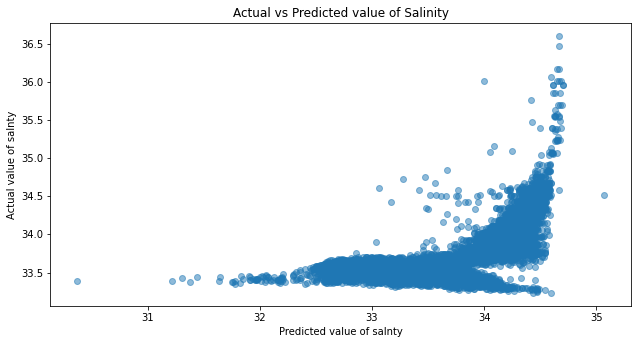

In [8]:
plt.figure(figsize=[10.4,5.2])
plt.title("Actual vs Predicted value of Salinity")
plt.xlabel("Predicted value of salnty")
plt.ylabel("Actual value of salnty")
#Linear plot
plt.scatter(y_test,y_pred,alpha=0.5)
plt.show()